In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import re

stemfrequencydictionary = {}
stemworddictionary = {}

f = open("drive/My Drive/word2vec/finiteverbs2.txt", "r")
for x in f:
#  print(x)
  frequency = 0+int(re.sub("^ *([0-9]+) .*$", "\\1", x))
  stem = re.sub("^ *.*?\|([^-&]*?)[-&].*\\n", "\\1", x)
  word = re.sub("^ *.*?\|[^-&]*?[-&][A-Za-z0-9&]* *[0-9]* *(.*)\\n", "\\1", x)
 # print(word)
  if stem in stemfrequencydictionary:
    stemfrequencydictionary[stem] = stemfrequencydictionary.get(stem) + frequency
  else:
    stemfrequencydictionary[stem] = frequency
  stemworddictionary[word] = stem


print(stemfrequencydictionary)
print(stemworddictionary)

{'legen': 5, 'nehmen': 12, 'sehen': 23, 'tragen': 4, 'geben': 30, 'onnieren': 1, 'fallen': 4, 'fangen': 4, 'gewöhnen': 1, 'ruckeln': 1, 'stehen': 26, 'gehören': 2, 'hören': 7, 'wachen': 1, 'antworten': 1, 'denken': 28, 'kommen': 67, 'treiben': 1, 'treuen': 3, 'sein': 693, 'werden': 22, 'marschieren': 4, 'schalten': 1, 'setzen': 3, 'steigen': 1, 'lassen': 11, 'scheiden': 2, 'schlossen': 2, 'fahren': 39, 'leben': 6, 'zählen': 3, 'gelegen': 1, 'richten': 1, 'gehen': 95, 'bringen': 7, 'samen': 2, 'laufen': 17, 'halten': 3, 'stützen': 2, 'üben': 1, 'brauchen': 26, 'göttern': 1, 'kürzen': 1, 'kaufen': 3, 'längern': 1, 'nachlässigen': 1, 'reisen': 3, 'sitzen': 11, 'stärken': 1, 'suchen': 4, 'treten': 1, 'unglimpfen': 1, 'zweifeln': 2, 'arbeiten': 4, 'backen': 1, 'bauen': 1, 'beginnen': 1, 'behandeln': 1, 'beschäftigen': 1, 'bilden': 2, 'bleiben': 4, 'bremsen': 1, 'dauern': 3, 'drehen': 1, 'enden': 2, 'entfernen': 1, 'erinnern': 1, 'essen': 5, 'fühlen': 4, 'führen': 1, 'fehlen': 1, 'finden': 1

In [4]:
swf = {k: v for k, v in sorted(stemfrequencydictionary.items(), reverse=True, key=lambda item: item[1])}
print(swf)

{'sein': 693, 'haben': 389, 'machen': 98, 'gehen': 95, 'sagen': 90, 'kommen': 67, 'wissen': 44, 'fahren': 39, 'lachen': 31, 'geben': 30, 'denken': 28, 'stehen': 26, 'brauchen': 26, 'sehen': 23, 'werden': 22, 'laufen': 17, 'nehmen': 12, 'finden': 12, 'gucken': 12, 'meinen': 12, 'lassen': 11, 'sitzen': 11, 'tun': 10, 'glauben': 9, 'kümmern': 9, 'hängen': 8, 'kriegen': 8, 'hören': 7, 'bringen': 7, 'holen': 7, 'kennen': 7, 'stellen': 7, 'wohnen': 7, 'leben': 6, 'wünschen': 6, 'legen': 5, 'essen': 5, 'fragen': 5, 'liegen': 5, 'nennen': 5, 'stören': 5, 'tragen': 4, 'fallen': 4, 'fangen': 4, 'marschieren': 4, 'suchen': 4, 'arbeiten': 4, 'bleiben': 4, 'fühlen': 4, 'freuen': 4, 'lernen': 4, 'planen': 4, 'reden': 4, 'treuen': 3, 'setzen': 3, 'zählen': 3, 'halten': 3, 'kaufen': 3, 'reisen': 3, 'dauern': 3, 'kochen': 3, 'lesen': 3, 'letzen': 3, 'rufen': 3, 'sieben': 3, 'wollen': 3, 'ziehen': 3, 'gehören': 2, 'scheiden': 2, 'schlossen': 2, 'samen': 2, 'stützen': 2, 'zweifeln': 2, 'bilden': 2, 'ende

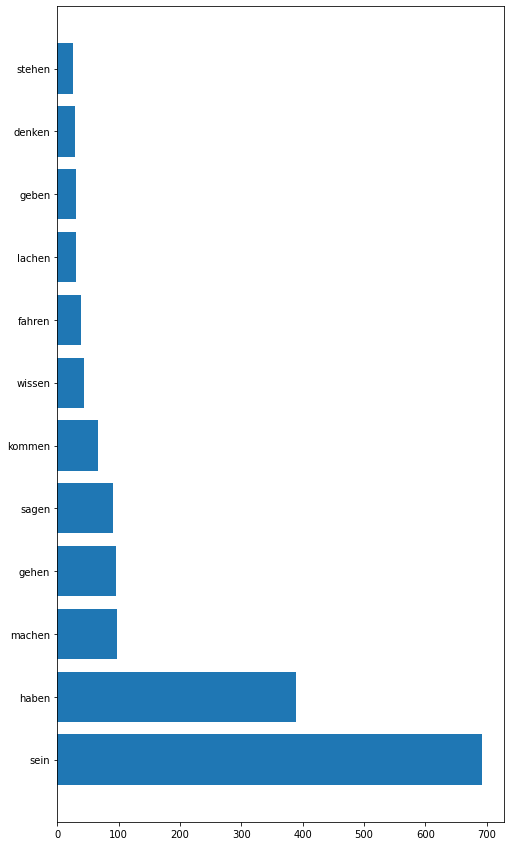

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,15))
ax = plt.barh(list(swf.keys())[0:12],  list(swf.values())[0:12], )

In [6]:
from gensim.models import KeyedVectors
# Load vectors directly from the file
model = KeyedVectors.load_word2vec_format('drive/My Drive/word2vec/german.model', binary=True)
# Access vectors for specific words with a keyed lookup:
vector = model['macht']
# see the shape of the vector (300,)
vector.shape

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(300,)

In [7]:
for word1 in list(stemworddictionary.keys()):
  similarities = dict()
  for word2 in list(stemworddictionary.keys()):
    try:
      if word1 != word2:
        similarity = model.similarity(word1, word2)
        similarities[word2] = similarity
      # print(word1+ " " + word2 + " " + str(similarity))    
    except:
      1==1
  sorted_similarities = {k: v for k, v in sorted(similarities.items(), reverse=True, key=lambda item: item[1])}
  if len(sorted_similarities) > 0 :
    print("\nSimilarities for word " + word1 + ":")
    for k in sorted_similarities:
      print(k, ": ", sorted_similarities[k])


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Streaming output truncated to the last 5000 lines.
wohnt :  0.5362531
kannten :  0.5305814
kamen :  0.4835913
interviewten :  0.46213332
standen :  0.44529685
kennen :  0.43288356
sagten :  0.43170568
interviewt :  0.4269028
benahmen :  0.4221048
lebt :  0.4199818
gingen :  0.41994026
tanzten :  0.41928935
betreue :  0.4147402
erinnern :  0.41424948
sitzen :  0.40881696
rannten :  0.3999438
weggingen :  0.39128384
reisen :  0.37241864
traumatisiert :  0.37104958
heulten :  0.3693433
verlassen :  0.3676727
lernten :  0.36667007
renoviert :  0.3637898
unterhalten :  0.35711008
fand :  0.3495369
wuchsen :  0.3471184
anfingen :  0.33947507
lebe :  0.33728874
fahren :  0.33616057
bauen :  0.33240244
verreisen :  0.33190522
stellten :  0.33183408
kommen :  0.32966942
lauschen :  0.3277965
marschierte :  0.3274206
gab :  0.32539424
herrichten :  0.3253523
ging :  0.32156017
wart :  0.32066894
stehen :  0.3196456
suchen :  0.31916574
zog :  0.3191305
vegetiert :  0.3180578
zweit :  0.3180065
e

Cosine distance vector of similarity for te comparison of two words in word2vec

In [8]:
model.similarity('fahren','Gegend')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.41280174